In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-diffadv-heat)

In [2]:
m = 60;  n = 40;
[x, Dx, Dxx] = diffper(m, [-1, 1]);
[y, Dy, Dyy] = diffper(n, [-1, 1]);
[mtx, X, Y, vec, unvec] = tensorgrid(x, y);

Note that the initial condition should also be periodic on the domain.

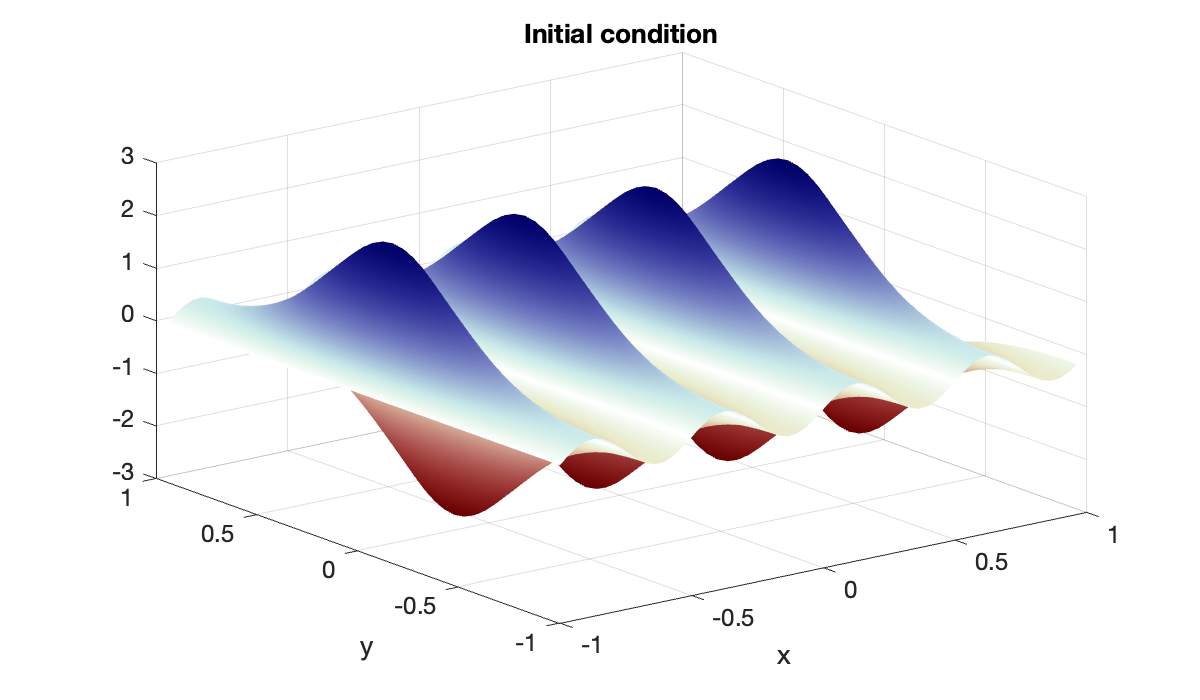

In [3]:
U0 = sin(4*pi*X) .* exp( cos(pi*Y) );
clf,  surf(X', Y', U0')
mx = max(abs(vec(U0)));
clim([-mx, mx]),  shading interp
colormap(redsblues)
xlabel('x'),  ylabel('y')  
title('Initial condition')  

This function computes the time derivative for the unknowns. The actual calculations take place using the matrix shape.

```{literalinclude} f13_2_heat.m
:language: matlab
```

Since this problem is parabolic, a stiff integrator is appropriate.

In [4]:
ivp = ode(ODEFcn=@f13_2_heat);
ivp.InitialTime = 0;
ivp.InitialValue = vec(U0);
ivp.Parameters = {0.1, Dxx, Dyy, vec, unvec};
ivp.Solver = "stiff";
sol = solutionFcn(ivp, 0, 0.2);
U = @(t) unvec(sol(t));

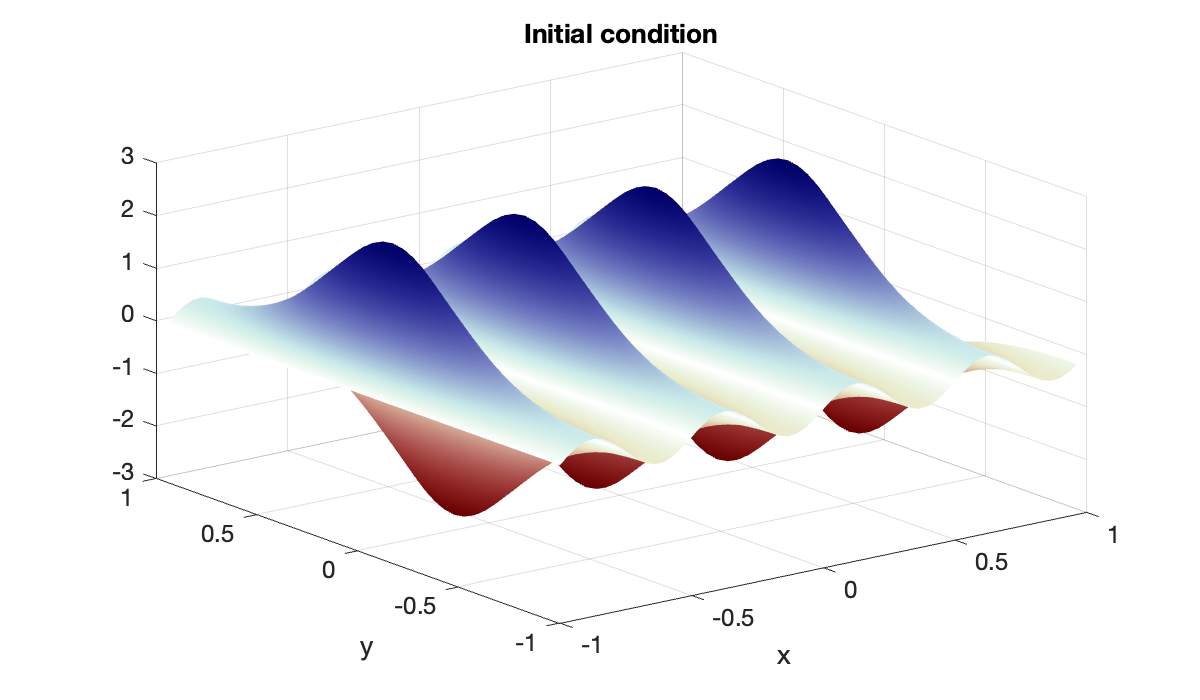

In [5]:
surf(X', Y', U0')
mx = max(abs(vec(U0)));
clim([-mx, mx]),  shading interp
colormap(redsblues)
xlabel('x'),  ylabel('y')  
title('Initial condition') 

Here is an animation of the solution.
```{tip}
:class: dropdown
Here `clims` are set so that colors remain at fixed values throughout the animation.
```

In [ ]:
title('Heat equation on a periodic domain')
vid = VideoWriter("figures/2d-heat.mp4","MPEG-4");
vid.Quality = 85;
open(vid);
for t = linspace(0, 0.2, 61)
    cla, surf(X', Y', U(t)')
    shading interp
    str = sprintf("t = %.2f", t);
    text(-0.9, 0.75, 2, str, fontsize=14);
    writeVideo(vid, frame2im(getframe(gcf)));
end
close(vid)